## Derivados Financieros Clase 1

Maurette subió **bocha** de código. Por lo que no vamos a comentar todo eso, porque no terminamos mas. Sino que vamos a tratar de sacar lo más importante y por ahi reescribir algunas cositas.

In [1]:
import pandas as pd
import requests
from datetime import date
from datetime import timedelta
import calendar 

#### Panel Opciones: Rava

In [2]:
## url de rava
url_rava_opciones = "http://clasico.rava.com/precios/panel.php?m=OPC"

## leo el html de la url y me traigo las tablas que tienen la palabra "Especie" adentro
rava_opciones = pd.read_html(url_rava_opciones, match="Especie", header=0, decimal=',', thousands='.')
rava_opciones = rava_opciones[4] ## la cuarta es la que quiero

In [3]:
## defino una funcion de limpieza
def limpiar_tabla_rava(tabla):
    
    ## me saco de encima los "-"
    ## maurette reemplaza los faltantes por -99:
    tabla = tabla.replace("-",-99)
    
    ## y paso todo a float
    tabla.iloc[:,-2:] = tabla.iloc[:,-2:].astype(float)
    tabla.iloc[:,1:7] = tabla.iloc[:,1:7].astype(float)
    
    
    return tabla

In [4]:
rava_opciones = limpiar_tabla_rava(rava_opciones)
rava_opciones

,Especie,Último,% Día,Anterior,Apertura,Mínimo,Máximo,Hora,Vol. Nominal,Vol. Efectivo
0,AGRC24.0AG,4.503,0,4.503,3.6,3.6,4.95,16:09,-99,-99
1,AGRC24.0OC,-99,-99,-99,-99,-99,-99,16:09,-99,-99
2,AGRC26.0AG,-99,-99,-99,-99,-99,-99,16:09,-99,-99
3,AGRC26.0OC,-99,-99,-99,-99,-99,-99,16:48,-99,-99
4,AGRC28.0AG,-99,-99,-99,-99,-99,-99,16:16,-99,-99
...,...,...,...,...,...,...,...,...,...,...
436,YPFV800.OC,35,-12.5,40,35,35,35,16:25,1,3500
437,YPFV840.AG,-99,-99,-99,-99,-99,-99,16:31,-99,-99
438,YPFV880.AG,55,0,55,-99,-99,-99,16:09,-99,-99
439,YPFV920.AG,-99,-99,-99,-99,-99,-99,16:27,-99,-99


#### Panel Acciones: Rava

In [5]:
## panel lider. 
url_rava_lider = "https://clasico.rava.com/precios/panel.php?m=LID"

rava_lider = pd.read_html(url_rava_lider, match="Especie", header=0, decimal=',', thousands='.')
rava_lider = rava_lider[5] ## este está en el 5

rava_lider = limpiar_tabla_rava(rava_lider)

## veamos los primeros 5
rava_lider.head(5)

,Especie,Último,% Día,Anterior,Apertura,Mínimo,Máximo,Hora,Vol. Nominal,Vol. Efectivo
0,MERVAL,67316.0,-99.00,-99.00,-99.0,-99.00,-99.0,17:00,-99.0,-99.0
1,ALUA,60.4,1.68,59.40,59.4,59.40,60.7,16:48,450656.0,27171909.0
2,BBAR,192.1,0.13,191.85,192.0,185.15,196.0,16:37,210069.0,40821536.0
3,BMA,253.5,0.14,253.15,254.0,247.00,258.3,16:48,139272.0,35600106.0
4,BYMA,780.0,0.13,779.00,782.0,775.00,784.0,16:30,40592.0,31656728.0


In [6]:
## panel general
url_rava_general = "https://clasico.rava.com/precios/panel.php?m=GEN"

rava_general = pd.read_html(url_rava_general, match="Especie", header=0, decimal=',', thousands='.')
rava_general = rava_general[4]

rava_general = limpiar_tabla_rava(rava_general)

## veamos los primeros 5
rava_general.head(5)

,Especie,Último,% Día,Anterior,Apertura,Mínimo,Máximo,Hora,Vol. Nominal,Vol. Efectivo
0,AGRO,26.00,-2.26,26.60,26.60,26.00,26.95,16:36,91993.0,2417983.0
1,AUSO,91.50,2.12,89.60,90.00,90.00,92.50,16:43,19303.0,1761497.0
2,BHIP,9.05,0.00,9.05,9.18,8.88,9.18,16:47,76413.0,688342.0
3,BOLT,3.79,-1.56,3.85,3.84,3.78,3.89,16:49,80664.0,308022.0
4,BPAT,71.30,0.85,70.70,69.10,69.10,71.30,16:42,3434.0,241707.0


In [7]:
### panel cedears

url_rava_cedears = "https://clasico.rava.com/precios/panel.php?m=CED"

rava_cedears = pd.read_html(url_rava_cedears, match="Especie", header=0, decimal=',', thousands='.')
rava_cedears = rava_cedears[4]

rava_cedears = limpiar_tabla_rava(rava_cedears)

## veamos los primeros 5
rava_cedears.head(5)

,Especie,Último,% Día,Anterior,Apertura,Mínimo,Máximo,Hora,Vol. Nominal,Vol. Efectivo
0,CEDEABA.CD,20.75,1.72,20.4,20.4,20.0,20.75,16:09,91.0,1842.0
1,CEDEAGOOGL,8480.00,0.29,8455.0,8532.0,8436.0,8555.00,16:50,4857.0,41212315.0
2,CEDEARAAPL,2634.00,0.00,2634.0,2650.0,2629.0,2660.00,16:47,28618.0,75429671.0
3,CEDEARABEV,1825.00,1.50,1798.0,1859.0,1770.0,1859.00,16:09,1946.0,3526941.0
4,CEDEARABT,5480.00,0.00,5480.0,5480.0,5392.0,5480.00,16:37,209.0,1140348.0


In [8]:
## los juntamos todos

rava_acciones = pd.concat([rava_lider,rava_general,rava_cedears])

#### Completamos tabla de opciones  
Vamos a tratar de reproducir la tabla que genera Maurette. Pero en vez de iterar, vamos a usar operaciones vectorizadas. 

In [9]:
## definimos un dict con el mapeo del ticker de la accion en la opcion al ticker de la accion 
## (esto lo adapte del codigo de maurette)

tickers = {
    'AGR':'AGRO', 'ALU': 'ALUA', 'BBA':'BBAR', 'BHI':'BHIP', 'BMA':'BMA', 'BOL': 'BOLT',
    'BYM': 'BYMA', 'CAR':'CARC', 'CEC':'CECO2', 'CEP':'CEPU', 'COM':'COME', 'CRE':'CRES',
    'EDN':'EDN', 'GFG':'GGAL', 'LOM':'LOMA', 'GVA':'VALO', 'MIR':'MIRG', 'MOR':'MORI',
    'PAM':'PAMP', 'SUP':'SUPV', 'TEC':'TECO2', 'TGN':'TGNO4', 'TGS':'TGSU2', 'TRA':'TRAN',
    'TXA':'TXAR', 'GVA':'VALO', 'YPF':'YPFD', 'TSL':'TSLA', 'MEL':'MELI', 'GOD':'GOLD',
    'APL':'AAPL'
}   


## funcion choreada del codigo de maurette 
def mes_nombre_a_numero(mes_nombre):
    """Auxiliar para pasar de nombre mes a numero mes"""
    
    if (mes_nombre == 'EN') or (mes_nombre == 'E'):
        mes_numero = 1
    elif (mes_nombre == 'FE') or (mes_nombre == 'F'):
        mes_numero = 2
    elif (mes_nombre == 'AB') or (mes_nombre == 'A'):
        mes_numero = 4
    elif (mes_nombre == 'JU') or (mes_nombre == 'J'):
        mes_numero = 6
    elif (mes_nombre == 'JL') or (mes_nombre == 'L'):
        mes_numero = 7
    elif (mes_nombre == 'AG') or (mes_nombre == 'G'):
        mes_numero = 8
    elif (mes_nombre == 'SE') or (mes_nombre == 'S'):
        mes_numero = 9
    elif (mes_nombre == 'OC') or (mes_nombre == 'O'):
        mes_numero = 10
    elif (mes_nombre == 'NO') or (mes_nombre == 'N'):
        mes_numero = 11
    elif (mes_nombre == 'DI') or (mes_nombre == 'D'):
        mes_numero = 12

    else:
        mes_numero = 0
    return mes_numero


## funcion auxiliar para tomar el próximo 3er jueves
def third_friday(month):
    
    current_date = date.today()
    current_month = current_date.month
    current_year = current_date.year
    
    if current_month > month:
        year = current_year +1
    else:
        year = current_year
        
    s = date(year, month, 15)
    return s + timedelta(days=(calendar.FRIDAY - s.weekday()) % 7)

In [10]:
def completar_opciones(rava_opciones):
    ## me quedo con las primeras 3 letras del ticker de la opcion
    op_ticker = rava_opciones.iloc[:,0].str[:3]
    rava_opciones.loc[:,"op_ticker"] = op_ticker

    ## para el ticker de la accion, busco el de la opcion en el listado, si no están, lo dejo como está:
    ac_ticker = op_ticker.apply(lambda x: tickers.get(x, x))
    rava_opciones.loc[:,"ac_ticker"] = ac_ticker

    ## la cuarta letra me da si es un put (v) o un call (c). Cambio V de venta por P de put
    tipo_opcion = rava_opciones.iloc[:,0].str[3].replace("V","P")
    rava_opciones.loc[:,"tipo_opcion"] = tipo_opcion

    ## las ultimas dos letras me dan el mes de vencimiento
    mes_expiracion = rava_opciones.iloc[:,0].str[-2:]
    ## a veces puede traer numero que se coló: chequeo, si lo trae lo borro
    mes_expiracion = mes_expiracion.apply(lambda x: x[-1] if x[0].isnumeric() else x)
    rava_opciones.loc[:,"mes_expiracion"]  = mes_expiracion

    ## paso el nombre del mes a numero de mes
    mes_numero = mes_expiracion.apply(mes_nombre_a_numero)
    rava_opciones.loc[:,"mes_numero"]  = mes_numero

    ## para el strike: tomo las posiciones 4 a 8 del ticker
    strike = rava_opciones.iloc[:,0].str[4:9]
    ## puede tener una letra al final. Chequeo, si es asi, me traigo todo menos ese caracter:
    strike = strike.apply(lambda x: x[:-1] if x[-1].isalpha() else x)
    ## lo paso a float
    strike = strike.astype(float)
    rava_opciones.loc[:,"strike"]  = strike

    ## acá lo que hago es crear un dataframe con los tickers de las acciones y lo mergeo con los precios
    ## y de ahi me quedo solo con el último precio. Esto hace que yo tenga una columna
    ## del mismo tamaño de mi dataframe de opciones pero con la data del ultimo precio de acciones.
    spot = pd.DataFrame({"Especie":ac_ticker}).merge(rava_acciones, how ="left").loc[:,["Último"]]
    spot = spot.iloc[:,0]
    rava_opciones.loc[:,"spot"]  = spot


    ## calculo la fecha de expiracion de la opcion
    fecha_expiracion = mes_numero.apply(third_friday)
    rava_opciones.loc[:,"fecha_expiracion"]  = fecha_expiracion

    ## y calculo el time to maturity
    ttm = fecha_expiracion - date.today()
    ttm = ttm.apply(lambda x: x.days) ## me quedo con los dias
    rava_opciones.loc[:,"ttm"]  = ttm

    ## moneyness
    moneyness = spot/strike
    rava_opciones.loc[:,"moneyness"]  = moneyness

    ## completamos valores faltantes con -99
    rava_opciones = rava_opciones.fillna(-99)
    
    return rava_opciones

In [11]:
rava_opciones = completar_opciones(rava_opciones)

In [12]:
## Le hago la misma limpieza que hace Maurette, pero podríamos dejarlo acá
rava_opciones= rava_opciones.loc[:,["Especie","ac_ticker", "spot", "tipo_opcion", 
                                    "strike", "ttm", "Último","moneyness"]]

rava_opciones.columns = ["Especie", "Ticker", "Spot", "CallPut", "Strike" ,"TTM", "Last", "Moneyness"]


In [13]:
## ejemplo con aluar:
rava_opciones[rava_opciones.Ticker == "ALUA"].head(5)

,Especie,Ticker,Spot,CallPut,Strike,TTM,Last,Moneyness
5,ALUC31.0AG,ALUA,60.4,C,31.0,22,30.10,1.948387
6,ALUC31.0OC,ALUA,60.4,C,31.0,78,30.00,1.948387
7,ALUC35.0AG,ALUA,60.4,C,35.0,22,27.99,1.725714
8,ALUC45.0AG,ALUA,60.4,C,45.0,22,16.40,1.342222
9,ALUC47.0AG,ALUA,60.4,C,47.0,22,11.50,1.285106


#### To Do: abrir cuenta en pyhomebroker y pasarlo acá

#### Graficos

In [14]:
### Para cada vencimiento, grafico los strikes
ggal = rava_opciones[rava_opciones.Ticker == "GGAL"]

In [15]:
## tengo estos casos falopa que no se como arreglar porque no se cuanto vale el strike
rava_opciones[rava_opciones.Especie == "GFGC82983G"]

,Especie,Ticker,Spot,CallPut,Strike,TTM,Last,Moneyness
194,GFGC82983G,GGAL,147.75,C,82983.0,22,86.984,0.00178


In [16]:
## tomo los time to maturity
TTMs = ggal.TTM.unique()
TTMs

array([ 78,  22, 141,  50])

In [17]:
## tomamos 141 como maurette
ggal[ggal.TTM == 141]

,Especie,Ticker,Spot,CallPut,Strike,TTM,Last,Moneyness
157,GFGC145.DI,GGAL,147.75,C,145.0,141,-99.0,1.018966
168,GFGC170.DI,GGAL,147.75,C,170.0,141,18.5,0.869118
183,GFGC200.DI,GGAL,147.75,C,200.0,141,-99.0,0.738750
187,GFGC220.DI,GGAL,147.75,C,220.0,141,-99.0,0.671591
192,GFGC240.DI,GGAL,147.75,C,240.0,141,4.8,0.615625
218,GFGV135.DI,GGAL,147.75,P,135.0,141,-99.0,1.094444


In [18]:
TTMs

array([ 78,  22, 141,  50])

In [19]:
ggal[ggal.Strike == 82983]

,Especie,Ticker,Spot,CallPut,Strike,TTM,Last,Moneyness
194,GFGC82983G,GGAL,147.75,C,82983.0,22,86.984,0.00178
243,GFGV82983G,GGAL,147.75,P,82983.0,22,0.020,0.00178


In [20]:
## borro los casos falopa y los que no tienen precio 
ggal = ggal[ggal.Strike.between(0,500)]
ggal = ggal[ggal.Last > 0]

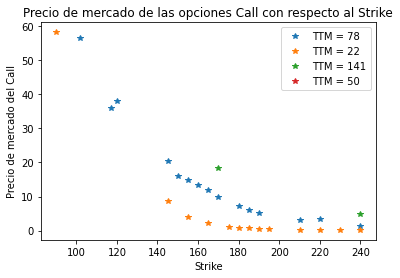

In [21]:
## para un call, grafica el strike contra el precio de mercado del call
## lo colorea para distintos time to maturity

from matplotlib import pyplot as plt
CP = "C"
for TTM in TTMs:
    Ks = ggal[(ggal.TTM == TTM) & (ggal.CallPut == CP)].Strike
    precios = ggal[(ggal.TTM == TTM) & (ggal.CallPut == CP)].Last
    plt.plot(Ks, precios,'*', label='TTM = '+str(TTM))


plt.legend()

plt.xlabel('Strike')
plt.ylabel('Precio de mercado del Call')
plt.title('Precio de mercado de las opciones Call con respecto al Strike')
    
plt.show()
    

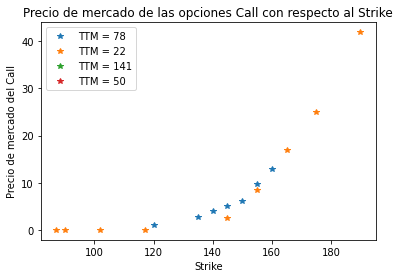

In [22]:
## para un put, grafica el strike contra el precio de mercado del put
## lo colorea para distintos time to maturity

CP = "P"
for TTM in TTMs:
    Ks = ggal[(ggal.TTM == TTM) & (ggal.CallPut == CP)].Strike.values
    precios = ggal[(ggal.TTM == TTM) & (ggal.CallPut == CP)].Last.values
    plt.plot(Ks, precios,'*', label='TTM = '+str(TTM))


plt.legend()

plt.xlabel('Strike')
plt.ylabel('Precio de mercado del Call')
plt.title('Precio de mercado de las opciones Call con respecto al Strike')
    
plt.show()

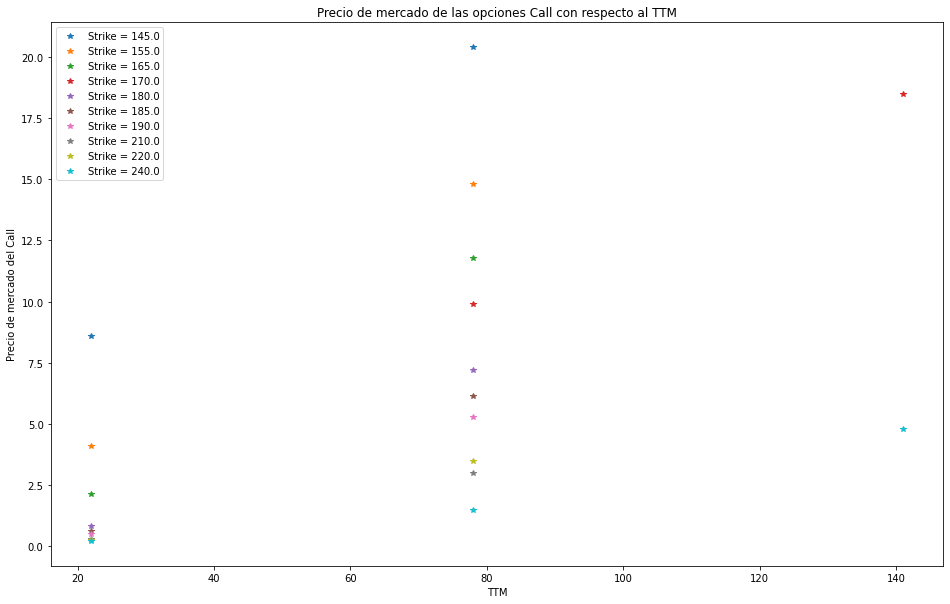

In [23]:
## grafico el time to maturity contra el precio de mercado del call
## para distintos strikes
## se ve que, a igual strike, cuanto mayor es el ttm, mayor es el precio de mercado

plt.figure(figsize=(16,10))

## tomo los strikes
Ks = ggal.Strike.unique()

## voy a mirar los calls
CP = "C"
for K in Ks:
    TTMs = ggal[(ggal.Strike == K) & (ggal.CallPut == CP)].TTM.values
    precios = ggal[(ggal.Strike == K) & (ggal.CallPut == CP)].Last.values
    if len(TTMs)>1:
        plt.plot(TTMs, precios,'*', label='Strike = '+str(K))

plt.legend()

plt.xlabel('TTM')
plt.ylabel('Precio de mercado del Call')
plt.title('Precio de mercado de las opciones Call con respecto al TTM')
    
plt.show()
    